In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
countries = pd.read_csv("C:\\Users\\Frida\\Desktop\\Bedu 2021\\Proyecto\\Bases de datos limpias\\países.csv")
countries.head()

,code,continent,country,date,total_cases_per_million,total_deaths_per_million,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,hdi
0,AFG,Asia,Afghanistan,09/12/2021,3955.901,183.781,54.422,597.029,9.59,64.83,0.511
1,ALB,Europe,Albania,09/12/2021,70611.786,1088.782,104.871,304.195,10.08,78.57,0.795
2,DZA,Africa,Algeria,09/12/2021,4756.612,137.303,17.348,278.364,6.73,76.88,0.748
3,AND,Europe,Andorra,09/12/2021,249140.316,1719.368,163.755,109.135,7.97,83.73,0.868
4,AGO,Africa,Angola,09/12/2021,1925.701,51.159,23.890,276.045,3.94,61.15,0.581


In [71]:
paises_limpio = pd.DataFrame(countries.loc[:, ["continent",
                       "country",
                       "date",
                       "cardiovasc_death_rate",
                       "diabetes_prevalence",
                       "total_cases_per_million", 
                       "total_deaths_per_million",
                                              "hdi"]])
paises_limpio.head()

,continent,country,date,cardiovasc_death_rate,diabetes_prevalence,total_cases_per_million,total_deaths_per_million,hdi
0,Asia,Afghanistan,09/12/2021,597.029,9.59,3955.901,183.781,0.511
1,Europe,Albania,09/12/2021,304.195,10.08,70611.786,1088.782,0.795
2,Africa,Algeria,09/12/2021,278.364,6.73,4756.612,137.303,0.748
3,Europe,Andorra,09/12/2021,109.135,7.97,249140.316,1719.368,0.868
4,Africa,Angola,09/12/2021,276.045,3.94,1925.701,51.159,0.581


In [72]:
paises_limpio = paises_limpio[paises_limpio["total_cases_per_million"].notna()]
paises_limpio = paises_limpio[paises_limpio["diabetes_prevalence"].notna()]
paises_limpio

,continent,country,date,cardiovasc_death_rate,diabetes_prevalence,total_cases_per_million,total_deaths_per_million,hdi
0,Asia,Afghanistan,09/12/2021,597.029,9.59,3955.901,183.781,0.511
1,Europe,Albania,09/12/2021,304.195,10.08,70611.786,1088.782,0.795
2,Africa,Algeria,09/12/2021,278.364,6.73,4756.612,137.303,0.748
3,Europe,Andorra,09/12/2021,109.135,7.97,249140.316,1719.368,0.868
4,Africa,Angola,09/12/2021,276.045,3.94,1925.701,51.159,0.581
...,...,...,...,...,...,...,...,...
191,South America,Venezuela,09/12/2021,204.850,6.47,15209.992,181.955,0.711
192,Asia,Vietnam,09/12/2021,245.465,6.00,13929.401,276.931,0.704
193,Asia,Yemen,09/12/2021,495.003,5.35,329.511,64.184,0.470
194,Africa,Zambia,09/12/2021,234.499,3.94,11128.683,193.862,0.584


C:\Users\Frida\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


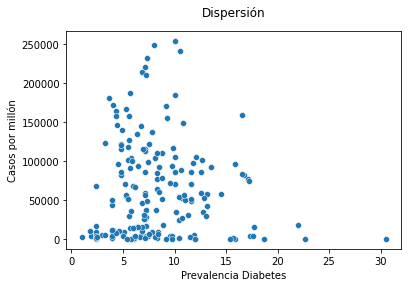

In [73]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Dispersión', pad=15)
ax.set_xlabel('Prevalencia Diabetes')
ax.set_ylabel('Casos por millón')

sns.scatterplot(paises_limpio['diabetes_prevalence'], paises_limpio['total_cases_per_million'], ax=ax);

In [74]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=6, max_iter=10000) # seis continentes. excluimos la Antártida
k_means.fit(paises_limpio[['diabetes_prevalence', 'total_cases_per_million']])

KMeans(max_iter=10000, n_clusters=6)

In [75]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [76]:
centers = k_means.cluster_centers_

centers

array([[9.00513514e+00, 4.36441675e+04],
       [6.97800000e+00, 1.62391685e+05],
       [9.66333333e+00, 8.19674595e+04],
       [7.48217949e+00, 5.16165404e+03],
       [8.15285714e+00, 2.31455491e+05],
       [7.22782609e+00, 1.13724288e+05]])

C:\Users\Frida\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Frida\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


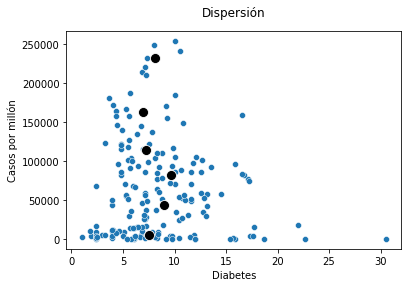

In [77]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Dispersión', pad=15)
ax.set_xlabel('Diabetes')
ax.set_ylabel('Casos por millón')

sns.scatterplot(paises_limpio['diabetes_prevalence'], paises_limpio['total_cases_per_million'], ax=ax, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

In [87]:
continente = pd.read_csv("C:\\Users\\Frida\\Desktop\\Bedu 2021\\Proyecto\\Bases de datos limpias\\ml_continentes.csv")
continente

,0,1,2,3,4,5
0,2227932.847,19580.182,12893.171,406.66,3351.32,32.349
1,880605.911,5485.100,15514.061,303.99,3462.15,29.719
2,5667218.834,26273.267,9436.536,288.57,3587.40,36.955
3,1331924.539,4278.681,4402.487,246.86,1734.47,17.387
4,885906.547,292.704,2247.887,93.73,901.09,9.158
5,73967.484,989.999,4240.242,181.72,869.02,8.569


In [106]:
df=pd.DataFrame(continente)
df

,0,1,2,3,4,5
0,2227932.847,19580.182,12893.171,406.66,3351.32,32.349
1,880605.911,5485.100,15514.061,303.99,3462.15,29.719
2,5667218.834,26273.267,9436.536,288.57,3587.40,36.955
3,1331924.539,4278.681,4402.487,246.86,1734.47,17.387
4,885906.547,292.704,2247.887,93.73,901.09,9.158
5,73967.484,989.999,4240.242,181.72,869.02,8.569


In [119]:
inertia = []
for n in range(1, 11):
  kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, algorithm='elkan')
  kmeans.fit(paises_limpio[['diabetes_prevalence', 'total_cases_per_million']])
  inertia.append(kmeans.inertia_)

C:\Users\Frida\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1323: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


In [120]:
inertia

[705321253471.6702,
 207161483945.27942,
 83683385807.56361,
 48122931675.870964,
 25479624177.29701,
 17362547221.0282,
 12127968534.322931,
 9720295019.905567,
 7704220915.275491,
 6092561561.420632]

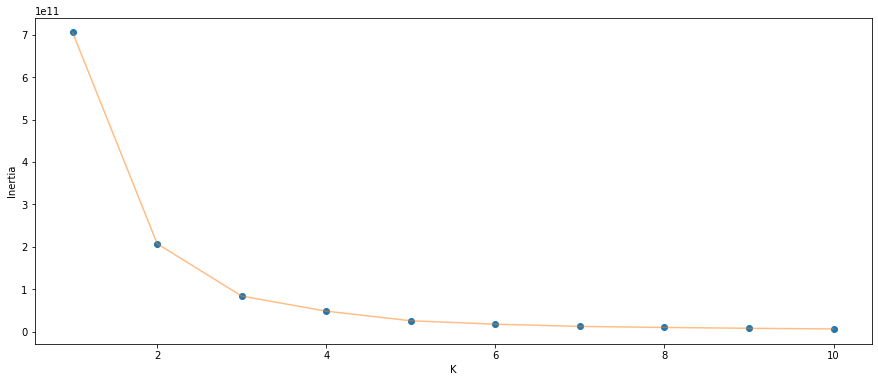

In [121]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel("K")
plt.ylabel("Inertia");

In [122]:
k_means = KMeans(n_clusters=2, max_iter=10000) # seis continentes. excluimos la Antártida
k_means.fit(paises_limpio[['diabetes_prevalence', 'total_cases_per_million']])
centers = k_means.cluster_centers_

centers

array([[8.20196970e+00, 1.28860019e+05],
       [8.01088710e+00, 2.13179681e+04]])

In [126]:
clasificaciones = k_means.predict(paises_limpio[['diabetes_prevalence', 'total_cases_per_million']])

C:\Users\Frida\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Frida\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


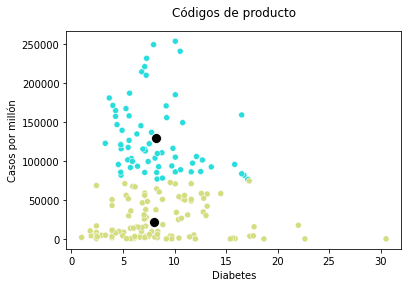

In [128]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Códigos de producto', pad=15)
ax.set_xlabel('Diabetes')
ax.set_ylabel('Casos por millón')

sns.scatterplot(paises_limpio['diabetes_prevalence'], paises_limpio['total_cases_per_million'], ax=ax, hue=clasificaciones, palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()